# Финальный проект (E-commerce — Выявление профилей потребления)

<b> 1  Изучение и предобработка данных </b>
- <b> 1.1 Изучение данных </b>
- <b> 1.2 Изменение типов данных </b>
- <b> 1.3 Поиск дубликатов </b>
- <b> 1.4 Вывод </b>

<b> 2  Исследовательский анализ данных </b>
- <b> 2.1 Добавление данных в таблицу </b>
- <b> 2.2 Проверка на аномалии </b>
- <b> 2.3 Вывод </b>

<b> 3 Определение категорий </b>
- <b> 3.1 Создание категорий пользователей </b>
- <b> 3.2 Создание категорий товаров </b>
- <b> 3.3 Вывод </b>

<b> 4  Кластеризация пользователей на основе истории их покупок </b>
- <b> 4.1 Построение дендограммы </b>
- <b> 4.2 Обучение модели методом K-means </b>
- <b> 4.3 Описание кластеров </b>
- <b> 4.4 Вывод </b>

<b> 5 Проверка статистических гипотез </b>
- <b> 5.1 Гипотеза №1. В разных кластерах средний чек различается </b>
- <b> 5.2 Гипотеза №2. В разных кластерах в среднем количество товаров в 1 чеке различается </b>
- <b> 5.3 Гипотеза №3. В разных кластерах в среднем количество заказов на 1 покупателя различается </b>
- <b> 5.4 Вывод </b>

<b> 6 Формулирование выводов и рекомендаций </b>

<b> 7 Презентация </b>

<b> 8 Дашборд </b>

## Изучение и предобработка данных

### Изучение данных

In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats as st
import math

<div style="border:solid blue 1px; padding: 20px">
Загрузим данные и сохраним их в переменной data

In [2]:
data = pd.read_csv('/datasets/ecommerce_dataset.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)
pd.set_option('float_format', '{:f}'.format)

In [4]:
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.000000
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.000000
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.000000
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.000000
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


<div style="border:solid blue 1px; padding: 20px">
Пропусков в данных нет

### Изменение типов данных

<div style="border:solid blue 1px; padding: 20px">
Изменим тип данных в столбце с датой

In [6]:
data['date'] = pd.to_datetime(data['date'], format="%Y%m%d%H")

In [7]:
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.000000
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.000000
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.000000
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.000000
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.000000


<div style="border:solid blue 1px; padding: 20px">
Далее обработаем значения в столбце product: приведем их к нижнему регистру, заменем ё на е

In [8]:
data['product'] = data['product'].str.lower()
data['product'] = data['product'].str.replace('ё','е')

In [9]:
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.000000
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.000000
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.000000
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.000000
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.000000


### Поиск дубликатов

<div style="border:solid blue 1px; padding: 20px">
Проверим данные на явные дубликаты

In [10]:
data.duplicated().sum()

0

<div style="border:solid blue 1px; padding: 20px">
Явных дубликатов нет

<div style="border:solid blue 1px; padding: 20px">
Как мы видим, один и тот же id клиента и заказа могут повторяться по несколько раз, так как в данных идет разбивка по каждой товарной позиции в чеке. Чтобы убедиться, что заказы не дублируются по несколько раз, проверим сколько раз оформлялся каждый заказ.

In [11]:
count = data.groupby('order_id').agg({'date':'nunique'}).sort_values(by='date', ascending=False)
display(count[count['date']>=2].count())
display(count[count['date']>=2])

date    284
dtype: int64

,date
order_id,
14833,74
70960,60
69162,23
71148,16
69531,12
70419,10
71463,9
69527,9
70962,8


<div style="border:solid blue 1px; padding: 20px">
284 заказа были проведены в системе по несколько раз (один из них даже 74! раза)

<div style="border:solid blue 1px; padding: 20px">
Удалим столбец с датой, чтобы очистить данные от дубликатов

In [12]:
data_check = data.drop('date', axis=1)

In [13]:
data_check.head()

,customer_id,order_id,product,quantity,price
0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.000000
1,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.000000
2,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.000000
3,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.000000
4,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.000000


In [14]:
data_check.duplicated().sum()

1864

<div style="border:solid blue 1px; padding: 20px">
Обнаружено 1864 дубликата. Удалим найденные дубликаты.

In [15]:
final_data = data_check.drop_duplicates()

In [16]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4873 entries, 0 to 6735
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  4873 non-null   object 
 1   order_id     4873 non-null   int64  
 2   product      4873 non-null   object 
 3   quantity     4873 non-null   int64  
 4   price        4873 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 228.4+ KB


In [17]:
len(data) - len(final_data)

1864

<div style="border:solid blue 1px; padding: 20px">
Дубликаты удалены. Теперь нужно вернуть в таблицу столбец с датой, но теперь каждому заказу будет соответствовать только один временной промежуток.

<div style="border:solid blue 1px; padding: 20px">
Отберем по каждому заказу время, когда он в певрый раз был загружен в систему

In [18]:
correct_date = data.groupby('order_id').agg({'date':'min'})

In [19]:
correct_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2784 entries, 12624 to 73164
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2784 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 43.5 KB


In [20]:
final_data['order_id'].nunique()

2784

<div style="border:solid blue 1px; padding: 20px">
Теперь присоединим к финальной, очищенной от дубликатов таблице, дату заказа

In [21]:
final_data = final_data.merge(correct_date, on='order_id', how='left')

In [22]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4873 entries, 0 to 4872
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  4873 non-null   object        
 1   order_id     4873 non-null   int64         
 2   product      4873 non-null   object        
 3   quantity     4873 non-null   int64         
 4   price        4873 non-null   float64       
 5   date         4873 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 266.5+ KB


In [23]:
final_data.head()

,customer_id,order_id,product,quantity,price,date
0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.000000,2018-10-01
1,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.000000,2018-10-01
2,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.000000,2018-10-01
3,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.000000,2018-10-01
4,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.000000,2018-10-01


<div style="border:solid blue 1px; padding: 20px">
Далее проверим, нет ли заказов, совершенных более чем одним покупателем

In [24]:
final_data.groupby('order_id').agg({'customer_id':'nunique'}).sort_values(by='customer_id', ascending=False).head()

,customer_id
order_id,
72845,4
71480,3
69485,3
69310,2
69833,2


<div style="border:solid blue 1px; padding: 20px">
Есть номера заказов, которые дублируются у разных покупателей. Оставим только одну версию заказа.

<div style="border:solid blue 1px; padding: 20px">
Создадим таблицу с уникальными номерами заказов и одним customer_id. Далее удалим customer_id из таблицы с данными, зачистим дубликаты и добавим customer_id заново.

In [25]:
customers = final_data[['customer_id', 'order_id']]
customers = customers.drop_duplicates('order_id')
final_data = final_data.drop('customer_id', axis=1)

In [26]:
customers.groupby('order_id').agg({'customer_id':'count'}).sort_values(by='customer_id', ascending=False).head()

,customer_id
order_id,
12624,1
71347,1
71330,1
71331,1
71333,1


In [27]:
final_data = final_data.drop_duplicates()

In [28]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 0 to 4872
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  4840 non-null   int64         
 1   product   4840 non-null   object        
 2   quantity  4840 non-null   int64         
 3   price     4840 non-null   float64       
 4   date      4840 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 226.9+ KB


In [29]:
final_data.head()

,order_id,product,quantity,price,date
0,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.000000,2018-10-01
1,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.000000,2018-10-01
2,68477,радермахера d-12 см h-20 см,1,112.000000,2018-10-01
3,68477,хризолидокарпус лутесценс d-9 см,1,179.000000,2018-10-01
4,68477,циперус зумула d-12 см h-25 см,1,112.000000,2018-10-01


In [30]:
final_data = final_data.merge(customers, on='order_id', how='left')

In [31]:
final_data.groupby('order_id').agg({'customer_id':'nunique'}).sort_values(by='customer_id', ascending=False).head()

,customer_id
order_id,
12624,1
71347,1
71330,1
71331,1
71333,1


In [32]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 0 to 4839
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     4840 non-null   int64         
 1   product      4840 non-null   object        
 2   quantity     4840 non-null   int64         
 3   price        4840 non-null   float64       
 4   date         4840 non-null   datetime64[ns]
 5   customer_id  4840 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 264.7+ KB


### Вывод

<div style="border:solid blue 1px; padding: 20px">
В полученных для анализа данных нет пропусков, но зато были обнаружены дубликаты: 284 заказа были задублированы (один из них даже 74 раза). Дубликаты были удалены, проблемные заказы теперь отображаются только с первоначальной датой заказа. Также были удалены 33 позиции, по которым один номер заказа был задублирован у нескольких пользователей.

## Исследовательский анализ данных

### Добавление данных в таблицу

<div style="border:solid blue 1px; padding: 20px">
Для дальнейшего анализа нам понадобится знать сезон совершения заказа, добавим его в нашу таблицу

In [33]:
final_data['month'] = final_data['date'].dt.month

In [34]:
def seasons (row):
    month = row['month']
    if month <= 2:
        return 'winter'
    if month <= 5:
        return 'spring'
    if month <= 8:
        return 'summer'
    if month <= 11:
        return 'autumn'
    if month == 12:
        return 'winter'
    else:
        return 'error'

In [35]:
final_data['season'] = final_data.apply(seasons, axis=1)

In [36]:
final_data.head()

,order_id,product,quantity,price,date,customer_id,month,season
0,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.000000,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,10,autumn
1,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.000000,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,10,autumn
2,68477,радермахера d-12 см h-20 см,1,112.000000,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,10,autumn
3,68477,хризолидокарпус лутесценс d-9 см,1,179.000000,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,10,autumn
4,68477,циперус зумула d-12 см h-25 см,1,112.000000,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,10,autumn


### Проверка на аномалии

In [37]:
final_data['date'].min()

Timestamp('2018-10-01 00:00:00')

In [38]:
final_data['date'].max()

Timestamp('2019-10-31 14:00:00')

<div style="border:solid blue 1px; padding: 20px">
В данных представлены наблюдения с 1 октября 2018 года по 31 октября 2019 года

In [39]:
final_data['customer_id'].nunique()

2420

<div style="border:solid blue 1px; padding: 20px">
Всего 2420 человек сделали заказ в нашем магазине

In [40]:
final_data['order_id'].nunique()

2784

<div style="border:solid blue 1px; padding: 20px">
Всего было совершено 2784 заказа

In [41]:
final_data.describe()

,order_id,quantity,price,month
count,4840.000000,4840.000000,4840.000000,4840.000000
mean,48110.605992,2.815702,514.925413,6.510744
std,27362.542193,17.637293,945.454941,3.296138
min,12624.000000,1.000000,9.000000,1.000000
25%,14773.250000,1.000000,90.000000,4.000000
50%,68854.000000,1.000000,150.000000,6.000000
75%,70812.500000,1.000000,488.000000,10.000000
max,73164.000000,1000.000000,14917.000000,12.000000


<div style="border:solid blue 1px; padding: 20px">
В среднем пользователи покупают товары в ~ 3 экземплярах, средняя цена составляет ~ 515 у.е. При этом мы видим, что наблюдаются выбросы: максимальное количество единиц товара 1000, максимальная стоимость товара - 14917 у.е., что повлияло на расчет среднего значения. По медианным значениям в среднем пользователи покупают 1 единицу товара, а средняя цена составляет 150 у.е.
Рассмотрим эти величины подробнее.

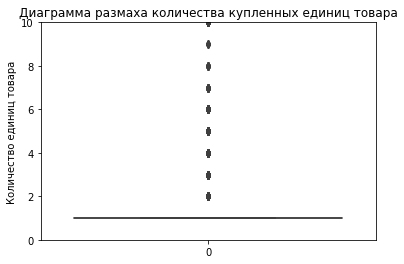

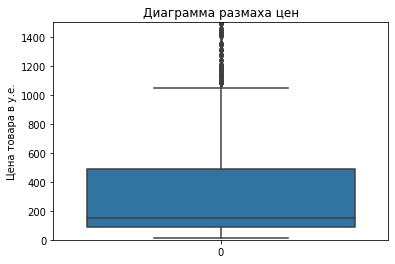

In [42]:
sns.boxplot(data=final_data['quantity'])
plt.ylim(0,10)
plt.title('Диаграмма размаха количества купленных единиц товара')
plt.ylabel('Количество единиц товара')
plt.show()

sns.boxplot(data=final_data['price'])
plt.ylim(0,1500)
plt.title('Диаграмма размаха цен')
plt.ylabel('Цена товара в у.е.')
plt.show()

<div style="border:solid blue 1px; padding: 20px">
Судя по построенным графикам boxplot нам следует удалить заказы, в которых товары куплены в количестве более 1 шт., а также товары стоимостью более 1100 рублей. Посчитаем, сколько в стоимостном выражении мы потеряем, удалив таких клиентов.

In [43]:
final_data['revenue'] = final_data['quantity'] * final_data['price']

In [44]:
check_2 = final_data.query('quantity >1 or price >= 1100')

In [45]:
check_2['revenue'].sum()/final_data['revenue'].sum()

0.7887196737933283

<div style="border:solid blue 1px; padding: 20px">
Таким образом мы потеряем данные по клиентам, принесшим нам 78% выручки. Это недопустимо. Изучим графики распределения и подберем лимиты, по которым очистим данные.

1.0

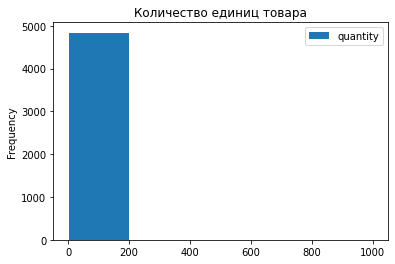

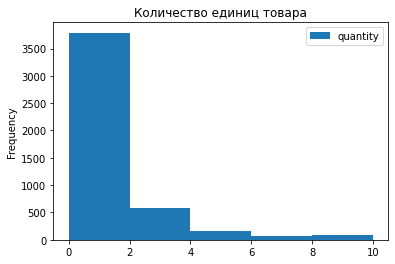

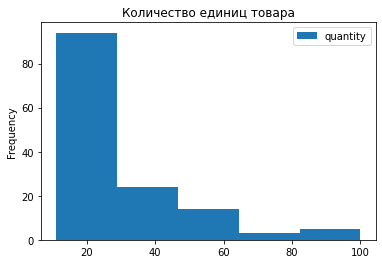

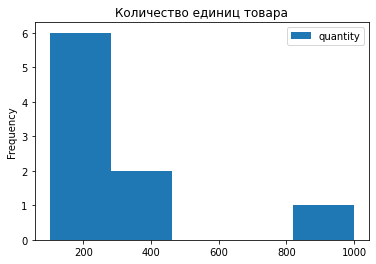

In [46]:
display(final_data['quantity'].median())
final_data.plot(y = 'quantity', title='Количество единиц товара', kind='hist', bins=5)
final_data.plot(y = 'quantity', title='Количество единиц товара', kind='hist', range=(0,10), bins=5)
final_data.plot(y = 'quantity', title='Количество единиц товара', kind='hist', range=(11,100), bins=5)
final_data.plot(y = 'quantity', title='Количество единиц товара', kind='hist', range=(101,1000), bins=5)
plt.show()

<div style="border:solid blue 1px; padding: 20px">
Сильно выделяется выброс в 1000 шт. Удалим его и посмотрим, на получившиеся цифры

In [47]:
good_data = final_data.query('quantity < 1000')

In [48]:
good_data.describe()

,order_id,quantity,price,month,revenue
count,4839.000000,4839.000000,4839.000000,4839.000000,4839.000000
mean,48105.722257,2.609630,514.892333,6.510849,711.232486
std,27363.260205,10.274303,945.549846,3.296470,1701.475183
min,12624.000000,1.000000,9.000000,1.000000,9.000000
25%,14772.500000,1.000000,90.000000,4.000000,120.000000
50%,68854.000000,1.000000,150.000000,6.000000,194.000000
75%,70810.500000,1.000000,488.000000,10.000000,734.000000
max,73164.000000,334.000000,14917.000000,12.000000,49432.000000


<div style="border:solid blue 1px; padding: 20px">
Далее построим графики распределения по цене товара

150.0

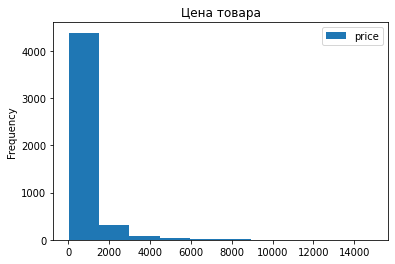

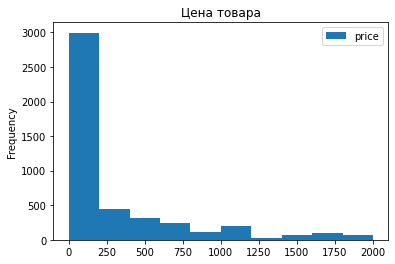

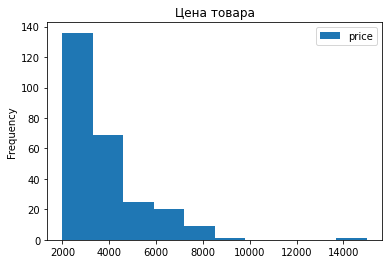

In [49]:
display(good_data['price'].median())
good_data.plot(y = 'price', title='Цена товара', kind='hist', bins=10)
good_data.plot(y = 'price', title='Цена товара', kind='hist', range=(0,2000), bins=10)
good_data.plot(y = 'price', title='Цена товара', kind='hist', range=(2000,15000), bins=10)
plt.show()

<div style="border:solid blue 1px; padding: 20px">
Не будем удалять выбросы по цене товара. Построим далее так же графики распределения по выручке на каждого пользователя

In [50]:
customer_revenue = good_data.groupby('customer_id').agg({'revenue':'sum'}).sort_values(by='revenue', ascending=False)
customer_revenue.head(20)

,revenue
customer_id,
c971fb21-d54c-4134-938f-16b62ee86d3b,159508.000000
4d93d3f6-8b24-403b-a74b-f5173e40d7db,57278.000000
58a4c3cc-504f-43ea-a74a-bae19e665552,53232.000000
146cd9bf-a95c-4afb-915b-5f6684b17444,49432.000000
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,41900.000000
8fba3604-ef57-4b9f-b2fe-3402fa8825c8,33680.000000
6987e6d6-a63a-4ce2-a2d0-f424092d235e,32718.000000
1b2764ad-9151-4051-a46a-9b01b62e6335,24370.000000
9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,22056.000000


712.0

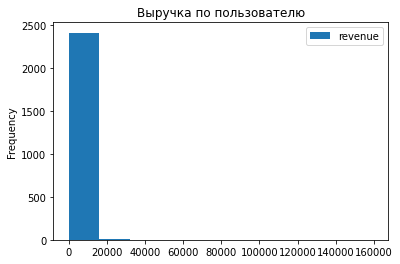

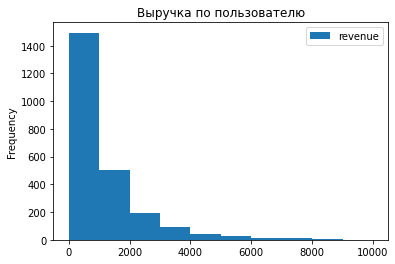

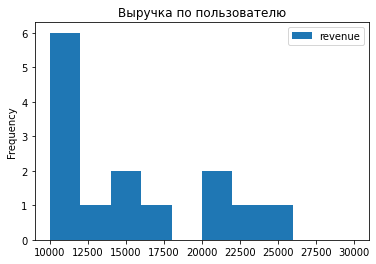

In [51]:
display(customer_revenue['revenue'].median())
customer_revenue.plot(y = 'revenue', title='Выручка по пользователю', kind='hist', bins=10)
customer_revenue.plot(y = 'revenue', title='Выручка по пользователю', kind='hist', range=(0,10000), bins=10)
customer_revenue.plot(y = 'revenue', title='Выручка по пользователю', kind='hist', range=(10000,30000), bins=10)
plt.show()

<div style="border:solid blue 1px; padding: 20px">
Удалим пользователей с выручкой более чем 14 тыс.

In [52]:
good_data = final_data.query('quantity < 1000 and customer_id != "c971fb21-d54c-4134-938f-16b62ee86d3b" and customer_id != "4d93d3f6-8b24-403b-a74b-f5173e40d7db" and customer_id != "58a4c3cc-504f-43ea-a74a-bae19e665552" and customer_id != "146cd9bf-a95c-4afb-915b-5f6684b17444" and customer_id != "498f12a4-6a62-4725-8516-cf5dc9ab8a3a" and customer_id != "498f12a4-6a62-4725-8516-cf5dc9ab8a3a" and customer_id != "8fba3604-ef57-4b9f-b2fe-3402fa8825c8" and customer_id != "6987e6d6-a63a-4ce2-a2d0-f424092d235e" and customer_id != "1b2764ad-9151-4051-a46a-9b01b62e6335" and customer_id != "9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f" and customer_id != "73d1cd35-5e5f-4629-8cf2-3fda829d4e58" and customer_id != "940c175f-ea87-44e0-9e16-0a3d0a9abecd" and customer_id != "909564b8-3a5c-4d3e-8310-5ba1c837bbd7" and customer_id != "5d189e88-d4d6-4eac-ab43-fa65a3c4d106" and customer_id != "0d87f4ae-465a-4fac-81e6-5d629761783e"')

In [53]:
good_data.describe()

,order_id,quantity,price,month,revenue
count,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000
mean,46957.274766,2.392118,490.547572,6.384280,626.852602
std,27619.442116,7.917321,903.852838,3.236495,1062.920440
min,12624.000000,1.000000,9.000000,1.000000,9.000000
25%,14764.000000,1.000000,90.000000,4.000000,120.000000
50%,68834.000000,1.000000,149.000000,5.000000,188.000000
75%,70874.000000,1.000000,464.000000,10.000000,674.000000
max,73162.000000,200.000000,8737.000000,12.000000,11250.000000


### Вывод

<div style="border:solid blue 1px; padding: 20px">
Для дальнейшей кластеризации клиентов в таблицу были добавлены сезоны совершения покупок. Также данные были проанализированы на аномалии. Большая часть клиентов покупает товар в единичном виде. Но удалив выбивающиеся значения, мы потеряем из виду клиентов, приносящих основной доход нашему магазину. 
Опираясь на этот факт, что получение прибыли - это основная цель бизнеса, было принято решение оставить товары, купленные в нескольких экземплярах, а также товары с ценой выше медианного значения. Были удалены только пользователь с покупкой вантузов в 1000 шт. и ряд пользователей с общим чеком более 14 тыс.
В следующем пункте создадим категорию пользователей в зависимости от количества купленных товаров: опт или розница.

## Определение категории товаров

### Создание категорий пользователей

<div style="border:solid blue 1px; padding: 20px">
Примем позиции, купленные в количестве более 20 шт. за оптовые покупки и определим их в отдельную категорию. Если оптовая покупка - wholesale, розничная - retail.
Покупаталей, у которых есть хотя бы одна позиция в заказе в количестве 1 шт, принимаем за розницу.

In [54]:
retail_customers = []
wholesale_customers = []

customers = list(good_data['customer_id'])
quantity = list(good_data['quantity'])

for index in range(len(quantity)):
    if quantity[index] <= 1:
        retail_customers.append(customers[index])
        
for index in range(len(quantity)):
    if quantity[index] >= 20:
        wholesale_customers.append(customers[index])        

In [55]:
def wholesale (row):
    quantity = row['quantity']
    customer = row['customer_id']
    
    if customer in retail_customers:
        return 'retail'
    
    if customer in wholesale_customers:
        return 'wholesale'
    
    else:
        return 'retail'

In [56]:
good_data['business_model'] = final_data.apply(wholesale, axis=1)

/tmp/ipykernel_293/1153728710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data['business_model'] = final_data.apply(wholesale, axis=1)


In [57]:
good_data.head()

,order_id,product,quantity,price,date,customer_id,month,season,revenue,business_model
0,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.000000,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,10,autumn,142.000000,retail
1,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.000000,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,10,autumn,194.000000,retail
2,68477,радермахера d-12 см h-20 см,1,112.000000,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,10,autumn,112.000000,retail
3,68477,хризолидокарпус лутесценс d-9 см,1,179.000000,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,10,autumn,179.000000,retail
4,68477,циперус зумула d-12 см h-25 см,1,112.000000,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,10,autumn,112.000000,retail


In [58]:
good_data.groupby('customer_id').agg({'business_model':'nunique'}).sort_values(by='business_model',ascending=False).head()

,business_model
customer_id,
000d6849-084e-4d9f-ac03-37174eaf60c4,1
ae292d9c-66c8-4a22-b4ab-9ca6152bdabd,1
ae5c12bd-d353-47cd-8371-f50d1824c892,1
ae650a78-e75a-4c2f-bd3c-21fdd23464f0,1
ae6940d3-a1c7-4997-8853-a5b8afc60d51,1


### Создание категорий товаров

<div style="border:solid blue 1px; padding: 20px">
Для кластеризации пользователей нам понадобится не только знать сезон, но и категорию товара. Напишем для этого функцию.

In [60]:
def product_category_2(row):
    product = row['product']
    
    if ('рассада' in product or ' растение' in product or 'пеларгония' in product 
        or 'герань' in product or 'циперус' in product or 'петуния' in product 
        or 'калибрахоа' in product or 'бакопа' in product or 'хлорофитум' in product
       or 'радермахера' in product or 'хризолидокарпус' in product or 'циперус' in product or 'мята' in product 
       or 'фуксия' in product or 'арбуз' in product or 'колокольчик' in product
       or 'томат' in product or 'базилик' in product or 'корыто' in product or 'декабрист' in product
        or 'лобелия' in product or 'эвкалипт' in product or 'искусственная лиана' in product or 'тимьян' in product
        or 'овсянница' in product or 'тележка' in product or 'дыня' in product or 'мимоза' in product
       or 'мединилла' in product or 'лаванда' in product or 'камнеломка' in product or 'аптения' in product 
        or 'нивянник' in product or 'вербена' in product or 'седум' in product or 'ясколка' in product
       or 'чабер' in product or 'котовник' in product or 'вербейник' in product or 'лавр' in product
       or 'контейнер для овощей' in product or 'примула' in product or 'мирт' in product or 'эхеверия' in product
       or 'алоэ' in product or 'бегония' in product or 'ведро для ягод' in product or 'фиалка' in product
       or 'флокс' in product  or 'шеффлера' in product or 'гардения' in product  or 'земляника' in product or 'антуриум' in product
       or 'сумка-тележка' in product or 'бальзамин' in product or 'сумка для тележки' in product
       or 'антуриум' in product or 'виноград ' in product  or 'банка' in product or 'спатифиллум' in product
        or 'калла' in product or 'кореопсис' in product  or 'бензин' in product or 'шнур' in product
       or 'ведро' in product or 'кашпо ' in product  or 'душица' in product or 'цикламен' in product
       or 'папоротник' in product or 'роза' in product  or 'хризантема' in product or 'вероника' in product
       or 'лен' in product or 'лапчатка' in product  or 'алиссум' in product
       or 'огурец' in product or 'ранункулус' in product  or 'капуста' in product or 'перчатки' in product
       or 'сельдерей' in product or 'сумка хозяйственная' in product  or 'розмарин' in product or 'гипсофила' in product
       or 'пуансеттия' in product or 'калатея' in product  or 'банка' in product or 'термометр' in product
       or 'фаленопсис' in product  or 'аквилегия' in product or 'укроп' in product
       or 'томат' in product  or 'цитрофортунелла' in product or 'урна' in product
       or 'клубника' in product  or 'баклажан' in product or 'муррайя' in product
       or 'мускари' in product  or 'пиретрум' in product or 'настурция' in product
       or 'патиссон' in product  or 'цинния' in product or 'патиссон' in product
       or 'дендробиум' in product  or 'календула' in product or 'синнингия' in product
       or 'гортензия' in product  or 'пеперомия' in product or 'маттиола' in product
       or 'кориандр' in product  or 'сциндапсус' in product or 'молодило' in product
       or 'осина' in product  or 'рудбекия' in product or 'монарда' in product
       or 'гайлардия' in product  or 'азалия' in product or 'хоста' in product
       or 'юкка' in product or 'платикодон' in product or 'лилейник' in product
       or 'виола' in product or 'афеляндра' in product or 'гвоздика' in product
       or 'эхинацея' in product or 'гвоздика' in product or 'смолевка' in product
       or 'космея' in product or 'георгина' in product or 'энотера' in product
       or 'лук' in product or 'джункус' in product or 'лантана' in product
       or 'бидон' in product or 'шпагат' in product or 'фатсия' in product
        or 'бадан' in product or 'физостегия' in product or 'солидаго' in product
        or 'бузульник' in product or 'астра' in product or 'травы' in product
       or 'гардения' in product or 'шнур' in product or 'корзина' in product
       or 'цикламен' in product or 'анемона' in product or 'лаватера' in product
       or 'барвинок' in product or 'драцена' in product or 'нефролепис' in product
       or 'незабудка' in product or 'кодонанта' in product or 'контейнер для мусора' in product
       or 'гербера' in product or 'котел' in product or 'валериана' in product or 'эпипремнум' in product
       or 'горох' in product or 'тюльпан' in product or 'буддлея' in product or 'змееголовник' in product
       or 'фал' in product or 'любисток' in product or 'петрушка' in product or 'табак' in product
       or 'фиттония' in product or 'цинерария' in product or 'гимнокалициум' in product or 'кактус' in product or 'шалфей' in product
       or 'вигна' in product or 'корзинка' in product or 'кабачок' in product or 'тыква' in product
       or 'мусорный контейнер' in product or 'фикус' in product or 'крассула' in product or 'скиммия' in product
       or 'аспарагус' in product or 'хамедорея' in product or 'ель' in product
       or 'замиокулькас' in product or 'кипарисовик' in product or 'гиностемма' in product
       or 'чеснок' in product or 'пуансетия' in product or 'подсолнечник' in product
       or 'эшшольция' in product or 'годеция' in product or 'импатиенс' in product
       or 'каланхое' in product or 'пахира' in product or 'диффенбахия' in product
       or 'соковарка' in product or 'морковь' in product or 'иссоп' in product
        or 'сантолина' in product or 'глоксиния' in product or 'кампанула' in product
        or 'соланум' in product or 'капсикум' in product or 'салат' in product 
        or 'артемизия' in product or 'бархатц' in product or 'адиантум' in product or 'каллуна' in product
       or 'мелисса' in product or 'нолина' in product or 'литопс' in product or 'альбука' in product):
        return 'растения и товары для дачи'
    if ('кувшин' in product or 'салатник' in product or 'измельчитель' in product
       or 'кофе' in product  or 'овощеварка' in product 
        or 'термокружка' in product or 'ложка' in product or 'нож' in product
       or 'стакан' in product or 'тарелка' in product or 'жестяная банка' in product or 'вилка' in product or 'блюдце' in product
        or 'сахарница' in product or 'скатерть' in product or 'кастрюля' in product
        or 'просеиватель' in product or 'ковш' in product  or 'набор столовых приборов' in product or 'чайник' in product
       or 'хлебница' in product or 'кружка' in product or 'блюдо' in product
       or 'сковорода' in product or 'миска' in product  or 'терка' in product or 'крышка' in product or 'миксер' in product  
       or 'посуд' in product or 'чай' in product or 'выпечк' in product or 'тepмокружка' in product 
       or 'лоток' in product or 'контейнер' in product or 'тортница' in product or 'сито' in product or 'венчик' in product
       or 'сотейник' in product or 'скалка' in product or 'свч' in product
       or 'толкушка' in product or 'разделочная доска' in product or 'емкость' in product
       or 'термос' in product or 'электроштопор' in product or 'бульонница' in product
       or 'орехоколка' in product or 'отделитель косточек' in product or 'бокал' in product or 'завтрак' in product 
        or 'пароварка' in product or 'половник' in product or 'яйц' in product
       or 'кондитер' in product or 'кекс' in product or 'картофелемялка' in product 
       or 'кипятильник' in product or 'соковыжималка' in product or 'пьезозажигалка' in product or 'мантоварка' in product
        or 'фужер' in product or 'рыбочистка' in product or 'пив' in product or 'лопатка' in product or 'противень' in product
       or 'овощечистка' in product):
        return 'товары для кухни'
    if ('таз' in product or 'ерш' in product or 'ванн' in product
      or 'штанга для ванной' in product or 'корзина для белья' in product or 'паста зубная' in product 
        or 'для белья' in product or 'дозатор для мыла' in product
       or 'полотен' in product or 'мыло' in product or 'коробка' in product
       or 'ванна' in product or 'зубная паста' in product or 'увлажняющая маска' in product 
        or 'халат' in product or 'вантуз' in product or 'мыльница' in product 
         or 'сантехник' in product or 'фен' in product):
        return 'товары для ванной'
    if ('муляж' in product or 'новогоднее дерево' in product or 'коврик' in product 
       or 'карниз' in product or 'искусственн' in product or 'штора' in product or 'полки' in product
       or 'салфет' in product or 'декоративная композиция' in product
       or 'подставка для обуви' in product or 'салфет' in product or 'овощеварка' in product 
        or 'комод' in product or 'этажерка' in product or 'стеллаж' in product
       or 'кофр' in product or 'ковер' in product  or 'наматрацник' in product or 'ткань' in product
       or 'наволочка' in product or 'обувница' in product or 'полка' in product
       or 'искусственный лист' in product or 'пуф' in product
       or 'покрывало' in product or 'коробка' in product 
       or 'ваза' in product or 'ящик почтовый' in product or 'подголовник' in product
       or 'ключница' in product or 'пароварка' in product
      or 'фоторамка' in product or 'подушк' in product or 'одеяло' in product
        or 'наматрасник' in product or 'плед' in product or 'простыня' in product
        or 'светильник' in product or 'подставка для цветов' in product or 'пододеяльник' in product):
        return 'декор'
    if ('стяжка' in product or 'сварка' in product or 'стремянк' in product
       or 'полировк' in product or 'фиксатор' in product or 'крючок' in product or 'сверло' in product
       or 'напильник' in product or 'штангенциркуль' in product or 'петля' in product
       or 'крепеж' in product or 'инструмент' in product or 'угольник' in product
       or 'шило' in product or 'основание для пробки' in product or 'завертка' in product
        or 'сверел' in product or 'линейка' in product or 'сушилка' in product
       or 'гладиль' in product or 'чехол' in product or 'вешалка' in product or 'подрукавник' in product
       or 'швабр' in product or 'тряпк' in product or 'средство против засоров' in product
       or 'средство для мытья пола' in product or 'скребок' in product or 'насадка-отжим' in product
       or 'прищеп' in product or 'насадка-моп' in product or 'для хранения' in product or 'совок' in product
       or 'сметка' in product or 'вентиляц' in product or 'пятен' in product or 'для чистки' in product
       or 'стирки' in product or 'антижир' in product or 'губка' in product or 'ролик' in product
       or 'для мытья' in product or 'весы' in product or 'тряпк' in product or 'веник' in product
       or 'щетка' in product  or 'окномойка' in product or 'плечики' in product
       or 'пылесос' in product or 'отжим для ведра' in product or 'скребок' in product
       or 'вешал' in product or 'утюг' in product or 'для стирки' in product or 'микрофибр' in product
       or 'кольца для штор' in product or 'для глажения' in product or 'уголок' in product
       or 'шпингалет' in product or 'ручка-скоба' in product):
        return 'хозяйственные товары'
    else:
        return 'пропуск'

In [61]:
good_data['category'] = good_data.apply(product_category_2, axis=1)

/tmp/ipykernel_293/1520274803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data['category'] = good_data.apply(product_category_2, axis=1)


In [62]:
good_data['category'].value_counts()

растения и товары для дачи    3354
хозяйственные товары           412
декор                          331
товары для кухни               273
товары для ванной              223
Name: category, dtype: int64

In [63]:
good_data[good_data['category']=='пропуск']['product'].value_counts()

Series([], Name: product, dtype: int64)

### Вывод

<div style="border:solid blue 1px; padding: 20px">
Для дальнейшей кластеризации пользователей были сформированы 2 категории пользователей - опт и розница, а также были объединены товары в 5 категорий - растения и товары для дачи, декор, товары для ванной, товары для кухни, хозяйственные товары

## Кластеризация пользователей на основе истории их покупок

### Стандартизация данных

In [65]:
good_data_2 = good_data.groupby('customer_id').agg({'quantity':'mean', 'price':'mean', 'revenue':'mean', 'order_id':'nunique'}).reset_index()
good_data_query_2 = good_data_2[['quantity', 'price', 'revenue', 'order_id']]
category_data_2 = pd.get_dummies(good_data_query_2)
category_data_2.head()

,quantity,price,revenue,order_id
0,1.000000,138.750000,138.750000,1
1,1.000000,442.000000,442.000000,1
2,2.000000,457.000000,914.000000,1
3,1.000000,1649.000000,1649.000000,1
4,2.000000,1162.000000,2324.000000,1


In [66]:
category_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2405 entries, 0 to 2404
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   quantity  2405 non-null   float64
 1   price     2405 non-null   float64
 2   revenue   2405 non-null   float64
 3   order_id  2405 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 75.3 KB


In [67]:
sc = StandardScaler()
X_sc = sc.fit_transform(category_data_2)
linked = linkage(X_sc, method = 'ward')

### Построение дендограммы

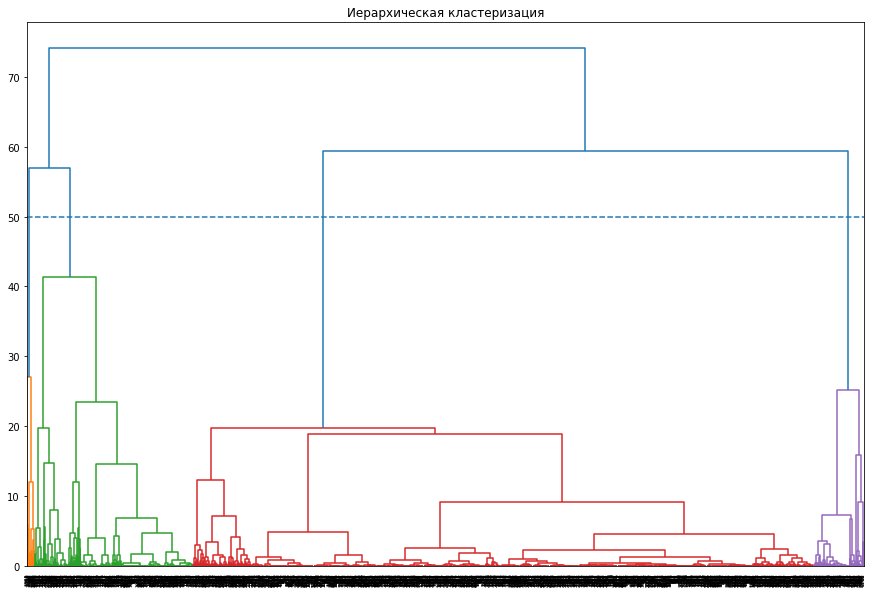

In [68]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.axhline(y=50, linestyle = '--')
plt.show() 

<div style="border:solid blue 1px; padding: 20px"> 
Примем число кластеров равным 4.

### Обучение модели методом K-means

<div style="border:solid blue 1px; padding: 20px"> 
Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Число кластеров примем равным 4.

In [69]:
km = KMeans(n_clusters=4, random_state=0)
labels = km.fit_predict(X_sc) 

<div style="border:solid blue 1px; padding: 20px"> 
Сохраняем метки кластера в поле нашего датасета

In [70]:
#good_data['cluster'] = labels

In [71]:
good_data_2['cluster'] = labels

In [72]:
good_data = good_data.merge(good_data_2[['cluster', 'customer_id']], on='customer_id')

In [73]:
good_data.head()

,order_id,product,quantity,price,date,customer_id,month,season,revenue,business_model,category,cluster
0,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.000000,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,10,autumn,142.000000,retail,растения и товары для дачи,0
1,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.000000,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,10,autumn,194.000000,retail,растения и товары для дачи,0
2,68477,радермахера d-12 см h-20 см,1,112.000000,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,10,autumn,112.000000,retail,растения и товары для дачи,0
3,68477,хризолидокарпус лутесценс d-9 см,1,179.000000,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,10,autumn,179.000000,retail,растения и товары для дачи,0
4,68477,циперус зумула d-12 см h-25 см,1,112.000000,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,10,autumn,112.000000,retail,растения и товары для дачи,0


### Описание кластеров

<div style="border:solid blue 1px; padding: 20px"> 
Выведем статистику по средним значениям наших признаков по кластеру

In [74]:
good_data_2.pivot_table(index='cluster', values=['quantity', 'price', 'revenue', 'order_id'], aggfunc='mean')

,order_id,price,quantity,revenue
cluster,,,,
0,1.000000,492.285711,2.419877,632.514665
1,1.025424,3351.911017,2.565678,3998.870763
2,1.000000,39.166667,109.333333,4100.600000
3,2.219178,441.906223,2.584450,563.408748


<div style="border:solid blue 1px; padding: 20px"> 
Посчитаем количество клиентов по кластерам

In [75]:
good_data_2.pivot_table(index='cluster', values='customer_id', aggfunc='count')

,customer_id
cluster,
0,2008
1,236
2,15
3,146


In [76]:
good_data_2['customer_id'].nunique()

2405

<div style="border:solid blue 1px; padding: 20px"> 
Построим графики по получившимся кластерам

In [77]:
category_columns = ['season', 'category','business_model']
numeric_columns = ['quantity', 'price', 'revenue', 'order_id']

<Figure size 864x432 with 0 Axes>

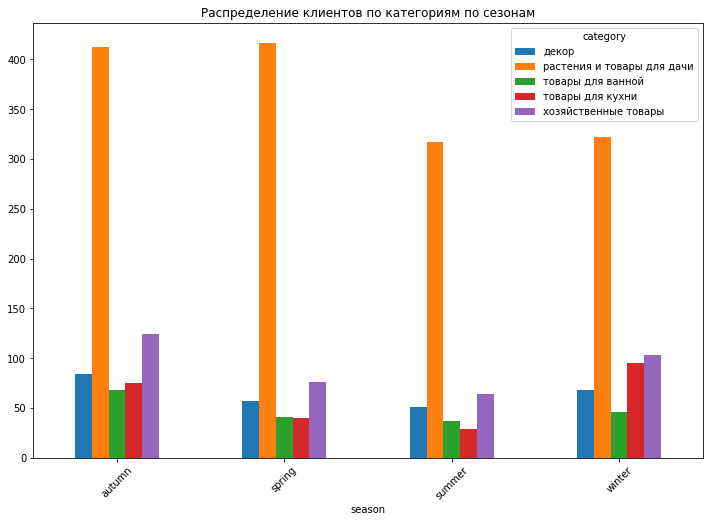

<Figure size 864x432 with 0 Axes>

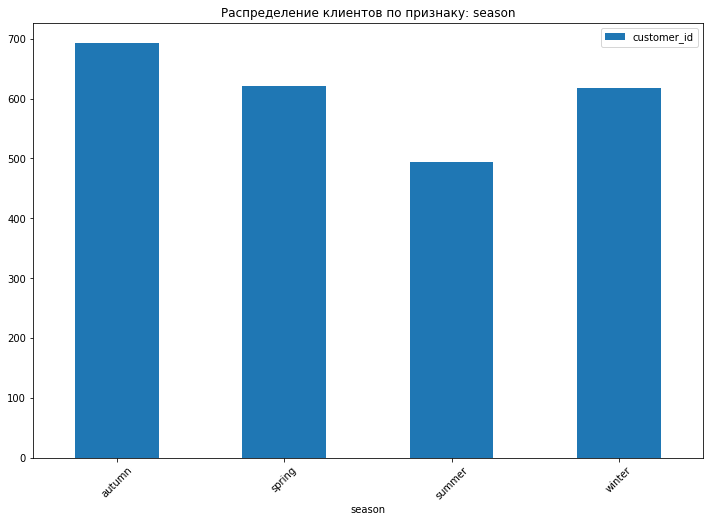

,customer_id
season,
autumn,692
spring,621
summer,494
winter,618


<Figure size 864x432 with 0 Axes>

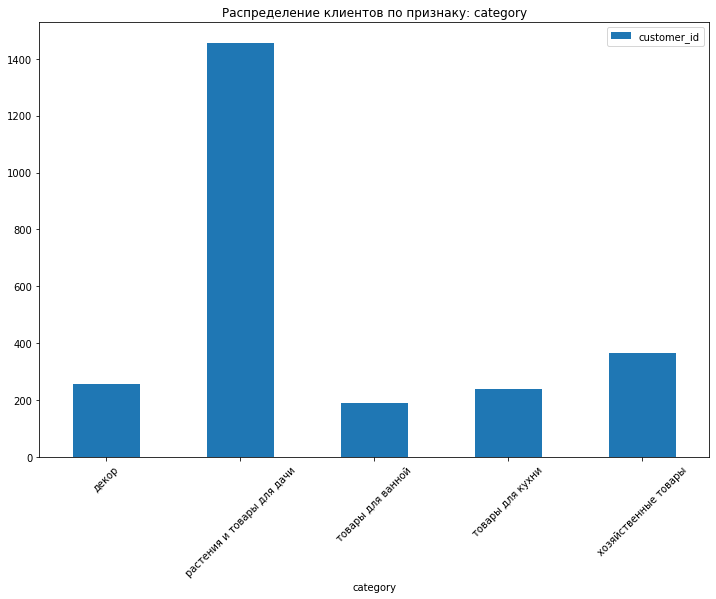

,customer_id
category,
декор,258
растения и товары для дачи,1455
товары для ванной,192
товары для кухни,238
хозяйственные товары,365


<Figure size 864x432 with 0 Axes>

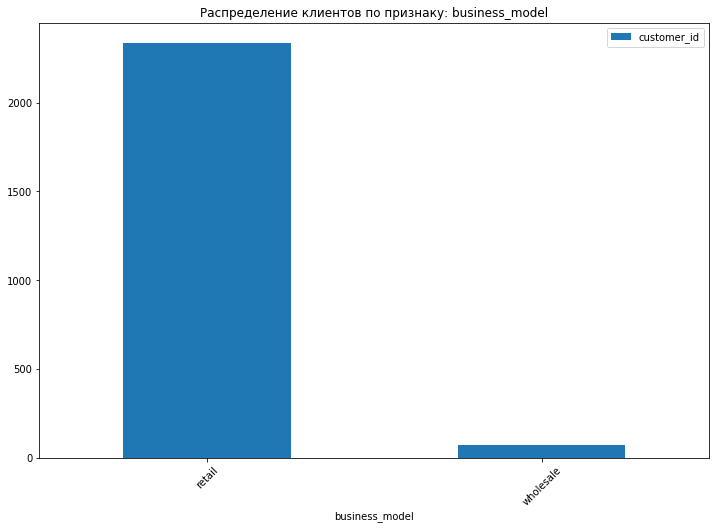

,customer_id
business_model,
retail,2334
wholesale,71


<Figure size 864x432 with 0 Axes>

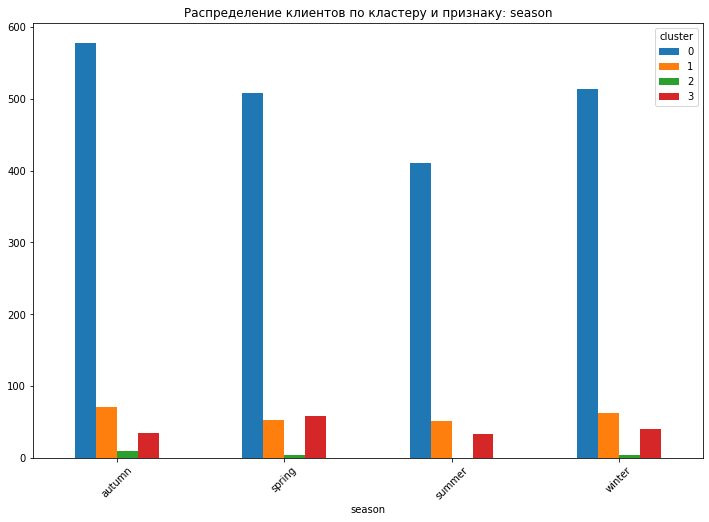

cluster,0,1,2,3
season,,,,
autumn,577.000000,71.000000,9.000000,35.000000
spring,508.000000,52.000000,3.000000,58.000000
summer,410.000000,51.000000,NaN,33.000000
winter,513.000000,62.000000,3.000000,40.000000


<Figure size 864x432 with 0 Axes>

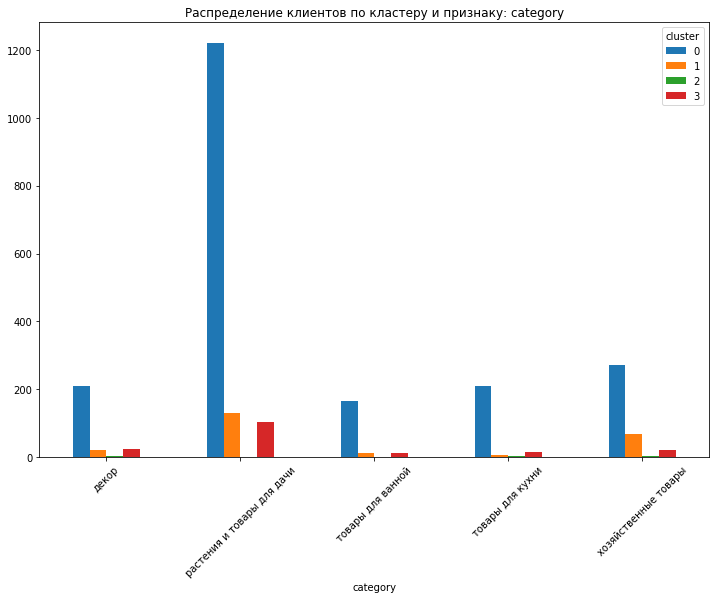

cluster,0,1,2,3
category,,,,
декор,210,20,4,24
растения и товары для дачи,1220,130,1,104
товары для ванной,167,13,1,11
товары для кухни,209,8,5,16
хозяйственные товары,272,67,5,21


<Figure size 864x432 with 0 Axes>

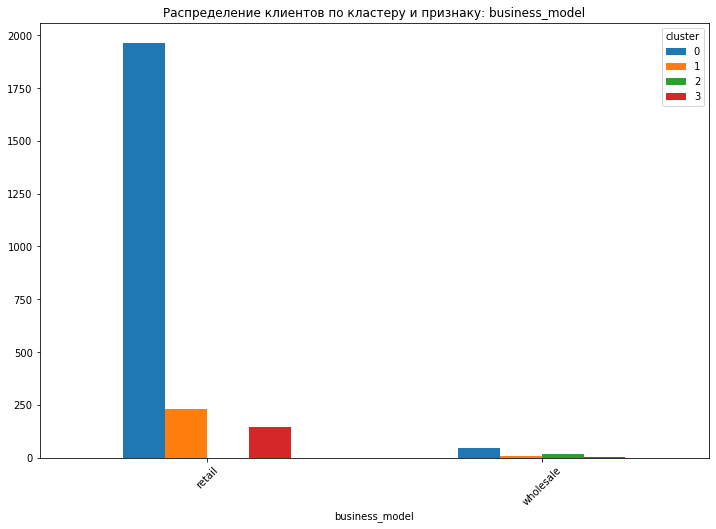

cluster,0,1,2,3
business_model,,,,
retail,1962.000000,228.000000,NaN,144.000000
wholesale,46.000000,8.000000,15.000000,2.000000


In [78]:
plt.figure(figsize = (12,6))
(good_data.pivot_table(index='season', columns='category', values='customer_id', aggfunc='nunique')
.plot(kind='bar', figsize = (12,8)))
plt.title('Распределение клиентов по категориям по сезонам')
plt.xticks(rotation = 45)
plt.show()

for feature in category_columns:
    plt.figure(figsize = (12,6))
    (good_data.pivot_table(index=feature, values='customer_id', aggfunc='nunique')
     .plot(kind='bar', figsize = (12,8)))
    plt.title('Распределение клиентов по признаку: ' + feature)
    plt.xticks(rotation = 45)
    plt.show()
    display(good_data.pivot_table(index=feature, values='customer_id', aggfunc='nunique'))
    
for feature in category_columns: 
    
    plt.figure(figsize = (12,6))
    (good_data.pivot_table(index=feature, columns='cluster', values='customer_id', aggfunc='nunique')
     .plot(kind='bar', figsize = (12,8)))
    plt.title('Распределение клиентов по кластеру и признаку: ' + feature)
    plt.xticks(rotation = 45)
    plt.show()
    display(good_data.pivot_table(index=feature, columns='cluster', values='customer_id', aggfunc='nunique')) 

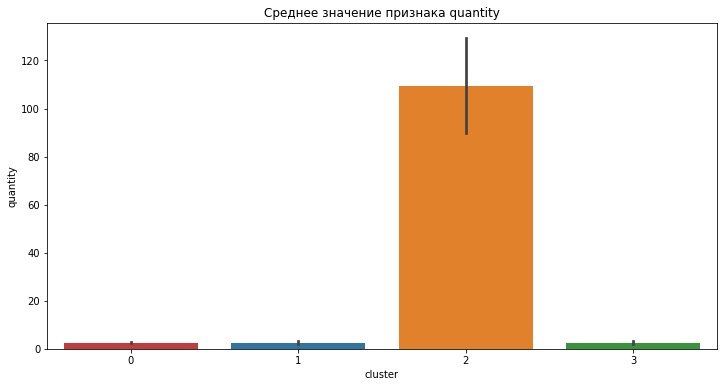

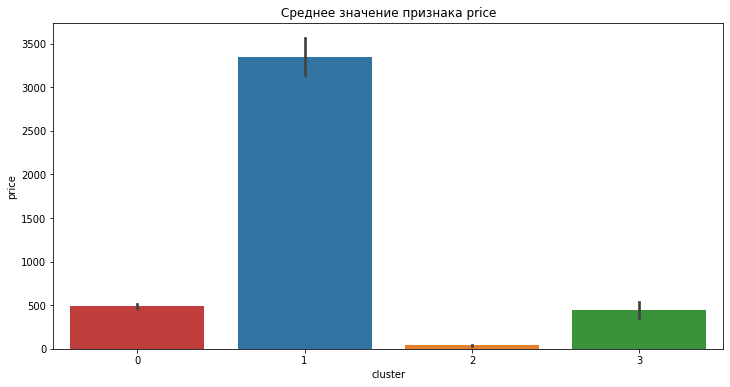

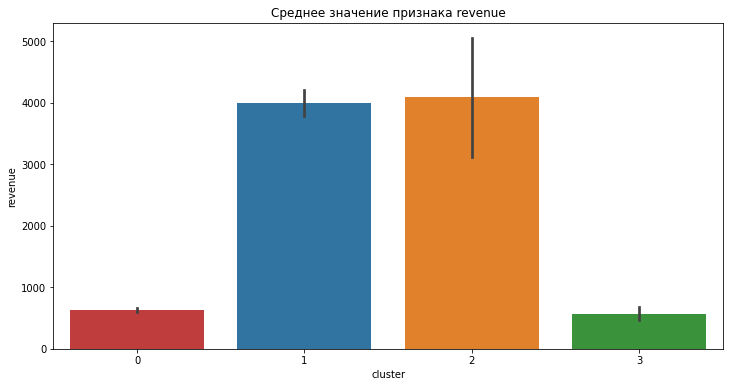

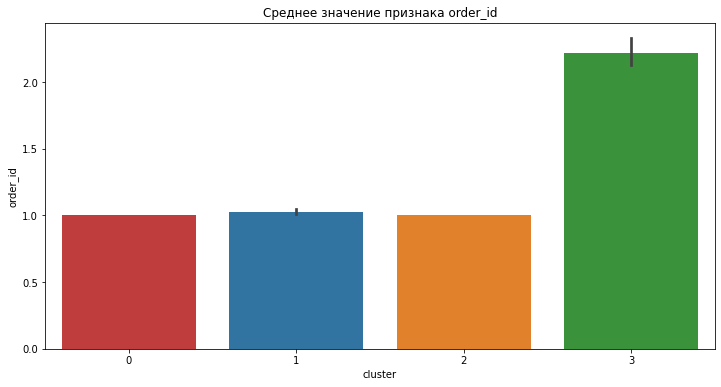

In [79]:
for feature in numeric_columns:
    plt.figure(figsize = (12,6))
    sns.barplot(data=good_data_2, x='cluster', y=feature, palette=["C3", "C0", "C1", "C2"])
    plt.title('Среднее значение признака ' + feature)
    plt.show()

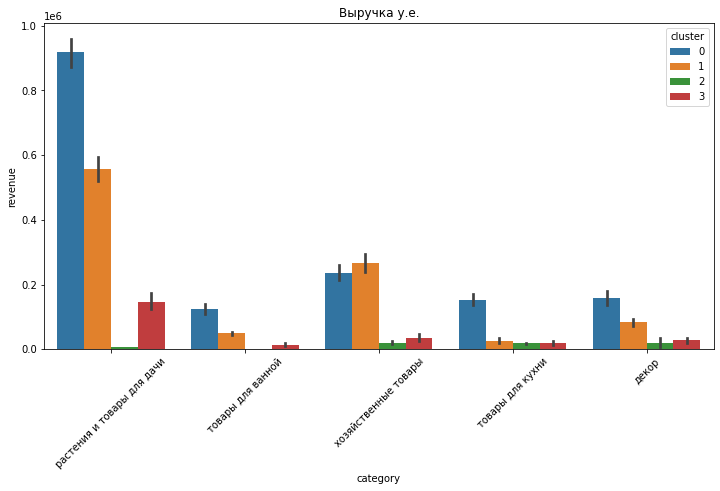

In [80]:
plt.figure(figsize = (12,6))
sns.barplot(data=good_data, x='category', y='revenue', hue='cluster', estimator=sum)
plt.title('Выручка у.е.')
plt.xticks(rotation = 45)
plt.show()

<div style="border:solid blue 1px; padding: 20px"> 
Большинство клиентов совершают покупки осенью (692 из 2405). Самая популярная категория товаров - растения и товары для дачи (1455 клиентов сделали покупки в данной категории). Причем тенденция сохраняется на протяжении всех сезонов.
    
Самый многочисленный кластер первый (2008 клиентов). Большинство его представителей (как и во втором и четвертом кластерах) больше всего покупают товары категории "растения и товары для дачи". Его отличительной особенностью является то, что клиенты покупают небольшое количество товаров по невысокой цене и совершают в среднем 1 заказ.    
    
Остальные три кластера более мелкие и в сумме агрегируют 397 клиентов. Рассмотрим детальнее каждый из них. Отличительная особенность второго кластера (236 клиентов) в том, что они также покупают небольшое количество товаров, но уже по высокой цене. Этот фактор влияет на то, что по второму кластеру высокая средняя выручка. В среднем они также совершают один заказ.
    
Отличительной особенностью третьего кластера (15 клиентов) явялется тот фактор, что они покупают большое количество товаров, но по низкой цене. Из-за большого объема средняя выручка по данному кластеру так же высока. Также интересно отметить, что в отличие от всех остальных кластеров здесь самые популярные категории - товары для кухни, хозяйственные товары и декор.

И последний четвертый кластер (146 клиентов). Его представители похожи на клиентов первого кластера с той лишь особенностью, что в среднем совершали 2 заказа в магазине и большинство покупок совершали весной.
    
В итоге отметим, что самая высокая выручка у кластеров 1 и 2, по категории растения и товары для дачи.

<div style="border:solid blue 1px; padding: 20px"> 
В отдельную таблицу вынесем id клиентов с разбивкой по кластерам для настройки рассылки

In [81]:
good_data.groupby('customer_id').agg({'cluster':'nunique'}).sort_values(by='cluster', ascending=False).head()

,cluster
customer_id,
000d6849-084e-4d9f-ac03-37174eaf60c4,1
ae292d9c-66c8-4a22-b4ab-9ca6152bdabd,1
ae5c12bd-d353-47cd-8371-f50d1824c892,1
ae650a78-e75a-4c2f-bd3c-21fdd23464f0,1
ae6940d3-a1c7-4997-8853-a5b8afc60d51,1


<div style="border:solid blue 1px; padding: 20px"> 
Все клиенты попали только в какой-то один из кластеров

<div style="border:solid blue 1px; padding: 20px"> 
Сформируем списки лояльных клиентов, которые оформили более 2 заказов

In [82]:
svod = good_data.pivot_table(index='customer_id', columns='cluster', values='order_id', aggfunc='count').reset_index()
svod.columns = ['customer_id', 'first_cluster', 'second_cluster', 'third_cluster', 'fourth_cluster']
svod = svod.fillna(0)
svod['total_qty'] = svod['first_cluster']+ svod['second_cluster']+svod['third_cluster']+svod['fourth_cluster']

In [83]:
loyal_clients = svod.query('total_qty > 1')

In [84]:
loyal_clients.head()

,customer_id,first_cluster,second_cluster,third_cluster,fourth_cluster,total_qty
0,000d6849-084e-4d9f-ac03-37174eaf60c4,4.000000,0.000000,0.000000,0.000000,4.000000
16,0184f535-b60a-4914-a982-231e3f615206,0.000000,0.000000,0.000000,30.000000,30.000000
21,01bd5b9a-2b4e-483c-95a3-40b040c392e8,7.000000,0.000000,0.000000,0.000000,7.000000
22,01c31cf3-cdb3-4b90-a2ef-ebe1b9e1fc33,3.000000,0.000000,0.000000,0.000000,3.000000
25,022ecd2e-bc6c-4e78-938e-b9e4bc526271,7.000000,0.000000,0.000000,0.000000,7.000000


In [85]:
len(loyal_clients)

477

In [86]:
loyal_clients_category = loyal_clients.merge(good_data[['customer_id', 'category', 'season']], on='customer_id', how='left')

In [87]:
loyal_clients_category = loyal_clients_category.drop_duplicates()

In [88]:
loyal_clients_category = (loyal_clients_category.drop(['first_cluster', 'second_cluster', 'third_cluster', 
                                                       'fourth_cluster', 'total_qty'], axis=1).sort_values(by='customer_id'))

In [89]:
loyal_clients_category.head()

,customer_id,category,season
0,000d6849-084e-4d9f-ac03-37174eaf60c4,растения и товары для дачи,autumn
4,0184f535-b60a-4914-a982-231e3f615206,растения и товары для дачи,spring
34,01bd5b9a-2b4e-483c-95a3-40b040c392e8,растения и товары для дачи,spring
41,01c31cf3-cdb3-4b90-a2ef-ebe1b9e1fc33,декор,autumn
44,022ecd2e-bc6c-4e78-938e-b9e4bc526271,растения и товары для дачи,winter


<div style="border:solid blue 1px; padding: 20px"> 
Итак, всего у нас 477 лояльных клиента (совершили более одной покупки в любых категориях).
Делаем рассылку по всем интересным им категориям, а также сезонам.

### Вывод

<div style="border:solid blue 1px; padding: 20px"> 
Путем проведения кластеризации было выделено 4 группы клиентов для настройки рекламной рассылки. 
    
- Большинство клиентов совершают покупки осенью, всего 692 покупателя;
- Самая популярная категория товаров - растения и товары для дачи (1455 клиентов);
- Клиенты входят только в один кластер;
- Сформирован список всего из 477 лояльных клиентов, для которых будет настроена рассылка (совершили более 1 заказа);

## Проверка статистических гипотез

### Гипотеза №1. В разных кластерах средний чек различается

<div style="border:solid blue 1px; padding: 20px">
Проверим гипотезу, что средний чек по кластерам различается

<div style="border:solid blue 1px; padding: 20px">
По очереди в качестве нулевой гипотезы возьмем то, что <b>средний чек по первому кластеру</b> равен <b>среднему чеку по второму-четвертому кластеру</b>, альтернативная гипотеза - средние чеки различаются.
    
Далее проведем аналогично сравнения второго, третьего и четвертого кластеров.

In [93]:
pt_1 = good_data.pivot_table(index=['order_id', 'cluster'], values='revenue', aggfunc='sum').reset_index()
pt_1.head()

,order_id,cluster,revenue
0,12624,0,375.000000
1,13547,0,684.000000
2,14480,0,359.000000
3,14481,3,600.000000
4,14482,0,376.000000


<div style="border:solid blue 1px; padding: 20px">
Проверим, распределены ли наши данные нормально. Критический уровень статистической значимости примем равным 0.05.

In [94]:
alpha = 0.05

results = st.shapiro(pt_1['revenue'])
p_value = results[1]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
     print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


<div style="border:solid blue 1px; padding: 20px">
Распределение не нормально. В таком случае для проверки нашей гипотезы применим непараметрический тест Уилкоксона-Манна-Уитни.

In [95]:
sample_0 = pt_1[pt_1['cluster']==0]['revenue']
sample_1 = pt_1[pt_1['cluster']==1]['revenue']
sample_2 = pt_1[pt_1['cluster']==2]['revenue']
sample_3 = pt_1[pt_1['cluster']==3]['revenue']

alpha = 0.05

<div style="border:solid blue 1px; padding: 20px">
Скорректируем критический уровень статистической значимости поправкой Бонферрони (0.05 поделим на 6, тк всего произведено 6 сравнений)

In [96]:
results_01 = st.mannwhitneyu(sample_0, sample_1)
results_02 = st.mannwhitneyu(sample_0, sample_2)
results_03 = st.mannwhitneyu(sample_0, sample_3)
results_12 = st.mannwhitneyu(sample_1, sample_2)
results_13 = st.mannwhitneyu(sample_1, sample_3)
results_23 = st.mannwhitneyu(sample_2, sample_3)
bonferroni_alpha = alpha / 6


if results_01.pvalue < bonferroni_alpha:
      print('Отвергаем нулевую гипотезу: разница между первым и вторым кластером статистически значима')
else:
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии между первым и вторым кластером сделать нельзя')

if results_02.pvalue < bonferroni_alpha:
      print('Отвергаем нулевую гипотезу: разница между первым и третьим кластером статистически значима')
else:
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии между первым и третьим кластером сделать нельзя')

if results_03.pvalue < bonferroni_alpha:
      print('Отвергаем нулевую гипотезу: разница между первым и четвертым кластером статистически значима')
else:
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии между первым и четвертым кластером сделать нельзя')
        
if results_12.pvalue < bonferroni_alpha:
      print('Отвергаем нулевую гипотезу: разница между вторым и третьим кластером статистически значима')
else:
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии между вторым и третьим кластером сделать нельзя')
        
if results_13.pvalue < bonferroni_alpha:
      print('Отвергаем нулевую гипотезу: разница между вторым и четвертым кластером статистически значима')
else:
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии между вторым и четвертым кластером сделать нельзя')
        
if results_23.pvalue < bonferroni_alpha:
      print('Отвергаем нулевую гипотезу: разница между третьим и четвертым кластером статистически значима')
else:
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии между третьим и четвертым кластером сделать нельзя')

Отвергаем нулевую гипотезу: разница между первым и вторым кластером статистически значима
Отвергаем нулевую гипотезу: разница между первым и третьим кластером статистически значима
Не получилось отвергнуть нулевую гипотезу, вывод о различии между первым и четвертым кластером сделать нельзя
Не получилось отвергнуть нулевую гипотезу, вывод о различии между вторым и третьим кластером сделать нельзя
Отвергаем нулевую гипотезу: разница между вторым и четвертым кластером статистически значима
Отвергаем нулевую гипотезу: разница между третьим и четвертым кластером статистически значима


<div style="border:solid blue 1px; padding: 20px">
Не получилось отвергнуть нулевые гипотезы для сравнения первого и четвертого кластеров, а также второго и третьего. По ним средние чеки равны.
Действительно, при анализе получившихся кластеров мы наблюдали, что средний чек по 1 и 4 кластеру низкий (низкая цена товара, небольшое количество единиц товара), а по 2 и 3 высокий (высокая стоимость товара во 2 кластере, большое количество единиц товара в 3 кластере привели к росту среднего чека).

### Гипотеза №2. В разных кластерах в среднем количество единиц товаров в 1 чеке  различается

<div style="border:solid blue 1px; padding: 20px">
Проверим гипотезу, что в разных кластерах в среднем количество единиц товаров в 1 чеке различается

<div style="border:solid blue 1px; padding: 20px">
По очереди в качестве нулевой гипотезы возьмем то, что <b>в среднем количество товаров в 1 чеке по первому кластеру</b> равно <b>среднему количеству товаров по второму-четвертому кластеру</b>, альтернативная гипотеза - средние чеки различаются. 

Далее проведем аналогично сравнения второго, третьего и четвертого кластеров.

In [97]:
pt_2 = good_data.pivot_table(index=['order_id', 'cluster'], values='quantity', aggfunc='sum').reset_index()
pt_2.head()

,order_id,cluster,quantity
0,12624,0,2
1,13547,0,3
2,14480,0,3
3,14481,3,4
4,14482,0,2


<div style="border:solid blue 1px; padding: 20px">
Проверим, распределены ли наши данные нормально. Критический уровень статистической значимости примем равным 0.05.

In [98]:
alpha = 0.05

results = st.shapiro(pt_2['quantity'])
p_value = results[1]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
     print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


<div style="border:solid blue 1px; padding: 20px">
Распределение не нормально. В таком случае для проверки нашей гипотезы применим непараметрический тест Уилкоксона-Манна-Уитни.

In [99]:
sample_0 = pt_2[pt_2['cluster']==0]['quantity']
sample_1 = pt_2[pt_2['cluster']==1]['quantity']
sample_2 = pt_2[pt_2['cluster']==2]['quantity']
sample_3 = pt_2[pt_2['cluster']==3]['quantity']

alpha = 0.05

<div style="border:solid blue 1px; padding: 20px">
Скорректируем критический уровень статистической значимости поправкой Бонферрони (0.05 поделим на 6, тк всего произведено 6 сравнений)

In [100]:
results_01 = st.mannwhitneyu(sample_0, sample_1)
results_02 = st.mannwhitneyu(sample_0, sample_2)
results_03 = st.mannwhitneyu(sample_0, sample_3)
results_12 = st.mannwhitneyu(sample_1, sample_2)
results_13 = st.mannwhitneyu(sample_1, sample_3)
results_23 = st.mannwhitneyu(sample_2, sample_3)
bonferroni_alpha = alpha / 6


if results_01.pvalue < bonferroni_alpha:
      print('Отвергаем нулевую гипотезу: разница между первым и вторым кластером статистически значима')
else:
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии между первым и вторым кластером сделать нельзя')

if results_02.pvalue < bonferroni_alpha:
      print('Отвергаем нулевую гипотезу: разница между первым и третьим кластером статистически значима')
else:
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии между первым и третьим кластером сделать нельзя')

if results_03.pvalue < bonferroni_alpha:
      print('Отвергаем нулевую гипотезу: разница между первым и четвертым кластером статистически значима')
else:
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии между первым и четвертым кластером сделать нельзя')
        
if results_12.pvalue < bonferroni_alpha:
      print('Отвергаем нулевую гипотезу: разница между вторым и третьим кластером статистически значима')
else:
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии между вторым и третьим кластером сделать нельзя')
        
if results_13.pvalue < bonferroni_alpha:
      print('Отвергаем нулевую гипотезу: разница между вторым и четвертым кластером статистически значима')
else:
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии между вторым и четвертым кластером сделать нельзя')
        
if results_23.pvalue < bonferroni_alpha:
      print('Отвергаем нулевую гипотезу: разница между третьим и четвертым кластером статистически значима')
else:
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии между третьим и четвертым кластером сделать нельзя')

Отвергаем нулевую гипотезу: разница между первым и вторым кластером статистически значима
Отвергаем нулевую гипотезу: разница между первым и третьим кластером статистически значима
Отвергаем нулевую гипотезу: разница между первым и четвертым кластером статистически значима
Отвергаем нулевую гипотезу: разница между вторым и третьим кластером статистически значима
Отвергаем нулевую гипотезу: разница между вторым и четвертым кластером статистически значима
Отвергаем нулевую гипотезу: разница между третьим и четвертым кластером статистически значима


<div style="border:solid blue 1px; padding: 20px">
Отвергаем все нулевые гипотезы: нет близких кластеров по среднему количеству единиц товаров в чеке

### Гипотеза №3. В разных кластерах в среднем количество заказов на 1 покупателя  различается

<div style="border:solid blue 1px; padding: 20px">
Проверим гипотезу, что в разных кластерах в среднем количество заказов на 1 покупателя различается

<div style="border:solid blue 1px; padding: 20px">
По очереди в качестве нулевой гипотезы возьмем то, что <b>среднее количество заказов на 1 покупателя по первому кластеру</b> равно <b>среднему количеству заказов на 1 покупателя по второму-четвертому кластеру</b>, альтернативная гипотеза - средние чеки различаются. 
    
Далее проведем аналогично сравнения второго, третьего и четвертого кластеров.

In [101]:
pt_3 = good_data.pivot_table(index=['customer_id', 'cluster'], values='order_id', aggfunc='count').reset_index()
pt_3.head()

,customer_id,cluster,order_id
0,000d6849-084e-4d9f-ac03-37174eaf60c4,0,4
1,001cee7f-0b29-4716-b202-0042213ab038,0,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,0,1
3,002d4d3a-4a59-406b-86ec-c3314357e498,0,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,0,1


<div style="border:solid blue 1px; padding: 20px">
Проверим, распределены ли наши данные нормально. Критический уровень статистической значимости примем равным 0.05.

In [102]:
alpha = 0.05

results = st.shapiro(pt_3['order_id'])
p_value = results[1]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
     print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


<div style="border:solid blue 1px; padding: 20px">
Распределение не нормально. В таком случае для проверки нашей гипотезы применим непараметрический тест Уилкоксона-Манна-Уитни.

In [103]:
sample_0 = pt_3[pt_3['cluster']==0]['order_id']
sample_1 = pt_3[pt_3['cluster']==1]['order_id']
sample_2 = pt_3[pt_3['cluster']==2]['order_id']
sample_3 = pt_3[pt_3['cluster']==3]['order_id']

alpha = 0.05

<div style="border:solid blue 1px; padding: 20px">
Скорректируем критический уровень статистической значимости поправкой Бонферрони (0.05 поделим на 6, тк всего произведено 6 сравнений)

In [104]:
results_01 = st.mannwhitneyu(sample_0, sample_1)
results_02 = st.mannwhitneyu(sample_0, sample_2)
results_03 = st.mannwhitneyu(sample_0, sample_3)
results_12 = st.mannwhitneyu(sample_1, sample_2)
results_13 = st.mannwhitneyu(sample_1, sample_3)
results_23 = st.mannwhitneyu(sample_2, sample_3)
bonferroni_alpha = alpha / 6


if results_01.pvalue < bonferroni_alpha:
      print('Отвергаем нулевую гипотезу: разница между первым и вторым кластером статистически значима')
else:
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии между первым и вторым кластером сделать нельзя')

if results_02.pvalue < bonferroni_alpha:
      print('Отвергаем нулевую гипотезу: разница между первым и третьим кластером статистически значима')
else:
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии между первым и третьим кластером сделать нельзя')

if results_03.pvalue < bonferroni_alpha:
      print('Отвергаем нулевую гипотезу: разница между первым и четвертым кластером статистически значима')
else:
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии между первым и четвертым кластером сделать нельзя')
        
if results_12.pvalue < bonferroni_alpha:
      print('Отвергаем нулевую гипотезу: разница между вторым и третьим кластером статистически значима')
else:
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии между вторым и третьим кластером сделать нельзя')
        
if results_13.pvalue < bonferroni_alpha:
      print('Отвергаем нулевую гипотезу: разница между вторым и четвертым кластером статистически значима')
else:
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии между вторым и четвертым кластером сделать нельзя')
        
if results_23.pvalue < bonferroni_alpha:
      print('Отвергаем нулевую гипотезу: разница между третьим и четвертым кластером статистически значима')
else:
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии между третьим и четвертым кластером сделать нельзя')

Отвергаем нулевую гипотезу: разница между первым и вторым кластером статистически значима
Не получилось отвергнуть нулевую гипотезу, вывод о различии между первым и третьим кластером сделать нельзя
Отвергаем нулевую гипотезу: разница между первым и четвертым кластером статистически значима
Не получилось отвергнуть нулевую гипотезу, вывод о различии между вторым и третьим кластером сделать нельзя
Отвергаем нулевую гипотезу: разница между вторым и четвертым кластером статистически значима
Отвергаем нулевую гипотезу: разница между третьим и четвертым кластером статистически значима


<div style="border:solid blue 1px; padding: 20px">
Отвергнуты гипотезы сравнения 1, 2, 3 кластера с 4. В нем среднее количество заказов на покупателя равно 2.

## Формулирование выводов и рекомендаций

<div style="border:solid blue 1px; padding: 20px">

По итогам проведенного исследования было выделено 4 группы покупателей в зависимости от среднего чека, количества купленного товара, цены товара, количества сделанных заказов:
    
    - 1 кластер - самый многочисленный кластер. Самая популярная категория товара - растения и товары для дачи, сезон - осень. Его отличительной особенностью является то, что клиенты покупают небольшое количество товаров по невысокой цене и совершают в среднем 1 заказ;
    - 2 кластер - второй по численности кластер. Самая популярная категория товара - растения и товары для дачи, сезон - осень. Они также покупают небольшое количество товаров, но уже по высокой цене (в среднем ~3100 у.е.). Этот фактор влияет на то, что по второму кластеру высокая средняя выручка. В среднем они также совершают один заказ;
    - 3 кластер - самый малочисленный кластер, тип покупателей - только оптовики. Они покупают большое количество товаров (в среднем ~ 110 ед.), но по низкой цене. Из-за большого объема средняя выручка по данному кластеру так же высока. Также интересно отметить, что в отличие от всех остальных кластеров здесь самые популярные категории - товары для кухни, хозяйственные товары и декор;
    - 4 кластер - его представители похожи на клиентов первого кластера с той лишь особенностью, что в среднем совершали 2 заказа в магазине, а также большинство покупок совершали весной;
    
Покупатели могут входить только в одну группу. 

<div style="border:solid blue 1px; padding: 20px">
Основываясь на полученных данных можно вынести следующие рекомендации для бизнеса:
    
   - Говоря об основной цели исследования, настройке рекламной рассылки, ее не стоит делать по всем покупателям, сделавшим заказ. В ходе исследования были выделены 477 лояльных клиента, предлагается настроить рекламную рассылку только по ним, только по интересным им категориям. 
   - Также предлагается делать рассылку с опорой на сезон. Стоит разослать рекламные предложения заранее, например, за неделю до наступления сезона.

А также:
    
    - В основном покупатели приобретают товары в единичном количестве средней ценой ~ в 150 руб., но основную прибыль магазину приносят покупатели, покупающие более 1 ед. товара, ценой более 1100 руб. Об этом не стоит забывать. Для увеличения прибыли стоит рассмотреть вопрос введения программы лояльности для покупателей, совершивших покупку товаров на определенную сумму. Это может подтолкнуть клиентов покупать не только базовые дешевые товары, но и рассмотреть покупку более дорогостоящих товаров в магазине «Пока все ещё тут». 
    
    - Также стоит выделить оптовых покупателей, предлагая им скидку при покупке больших партий товара. Это привлечет больше оптовых клиентов, увеличив выручку магазина (пока таких клиентов всего 71).
    
    - Большая часть клиентов совершает покупки в осенний период. К этому моменту магазин должен подготовиться: иметь достаточные складские запасы, маркетинговый бюджет для проведения рекламной кампании.
    
    - Больше всего товаров покупают в категории растения и товары для дачи, это направление приносит самую высокую выручку. На втором месте хозяйственные товары. Бизнесу стоит сконцентрироваться на этих двух направлениях.

## Презентация

* [Презентация] (https://drive.google.com/file/d/14cpTwJRDu8cWO5ligRPZqio17DkSMOEr/view?usp=sharing)

## Дашборд

* [Дашборд] (https://public.tableau.com/views/-_16589276150490/Dashboard1?:language=es-ES&publish=yes&:display_count=n&:origin=viz_share_link)